<a href="https://colab.research.google.com/github/kaitouz/OpenEdu/blob/main/Machine%20Learning%20%26%20Data%20Analysis/task08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("diabetes.csv")
task_data = df.head(600)

In [3]:
len(task_data[task_data["Outcome"] == 0])

392

In [4]:
train_df = task_data.head(int(len(task_data)*0.8))
test_df = task_data.tail(int(len(task_data)*0.2))

In [5]:
features = list(train_df.columns[:8])
X_train = train_df[features]
y_train = train_df['Outcome']

X_test = test_df[features]
y_true = test_df['Outcome']

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
tree = DecisionTreeClassifier(criterion='entropy',
                              min_samples_leaf=5,
                              max_leaf_nodes=5,
                              random_state=2020)
clf=tree.fit(X_train, y_train)

In [8]:
clf.tree_.max_depth

4

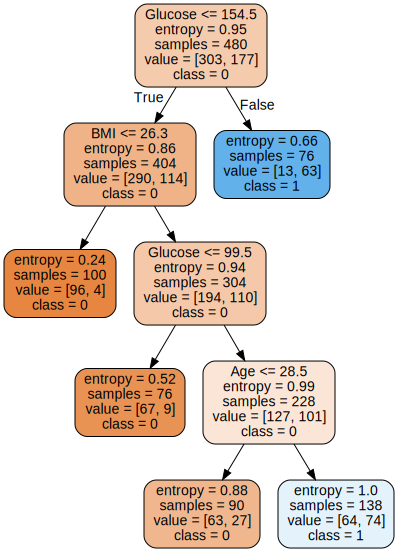

In [9]:
from sklearn.tree import export_graphviz
import graphviz
columns = list(X_train.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [10]:
y_pred = clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.7916666666666666

In [12]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro')

0.7499791649304108

In [13]:
clf.predict(df.loc[ [746, 725, 719, 721] , features])

array([0, 1, 0, 0])